# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Farras Rafi' Permana
- **Email:** farras2003@gmail.com
- **ID Dicoding:** [farrasrafi](https://www.dicoding.com/users/farrasrafi/)

# Menentukan Pertanyaan Bisnis

- Apakah terdapat periode dimana tingkat polusi udara berada pada nilai tertingginya untuk setiap tahun?
- Bagaimana kondisi cuaca (curah hujan, kelembapan, suhu, kecepatan angin) terhadap tingkat polusi udara?
- Bagaimana pengaruh hari dalam seminggu terhadap polusi udara?
- Bagaimana pengaruh waktu dalam sehari terhadap polusi udara?
- Apakah arah angin dapat berpengaruh pada tingkat polusi udara?

# Import semua Packages/Library yang digunakan

In [1]:
import os
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

warnings.filterwarnings('ignore')

# Data Wrangling

## Gathering Data

Menggabungkan data dari seluruh file ke dalam satu DataFrame.

In [2]:
dataset_path = "dataset"

merged_df = pd.DataFrame()
for files in os.listdir(dataset_path):
    df = pd.read_csv(os.path.join(dataset_path, files))
    print("File name: {}\nDataFrame shape: {}".format(files, df.shape))
    # print(df.describe(include="all"))
    merged_df = pd.concat([merged_df, df])

File name: air-quality-dataset-merged.csv
DataFrame shape: (420768, 18)
File name: PRSA_Data_Aotizhongxin_20130301-20170228.csv
DataFrame shape: (35064, 18)
File name: PRSA_Data_Changping_20130301-20170228.csv
DataFrame shape: (35064, 18)
File name: PRSA_Data_Dingling_20130301-20170228.csv
DataFrame shape: (35064, 18)
File name: PRSA_Data_Dongsi_20130301-20170228.csv
DataFrame shape: (35064, 18)
File name: PRSA_Data_Guanyuan_20130301-20170228.csv
DataFrame shape: (35064, 18)
File name: PRSA_Data_Gucheng_20130301-20170228.csv
DataFrame shape: (35064, 18)
File name: PRSA_Data_Huairou_20130301-20170228.csv
DataFrame shape: (35064, 18)
File name: PRSA_Data_Nongzhanguan_20130301-20170228.csv
DataFrame shape: (35064, 18)
File name: PRSA_Data_Shunyi_20130301-20170228.csv
DataFrame shape: (35064, 18)
File name: PRSA_Data_Tiantan_20130301-20170228.csv
DataFrame shape: (35064, 18)
File name: PRSA_Data_Wanliu_20130301-20170228.csv
DataFrame shape: (35064, 18)
File name: PRSA_Data_Wanshouxigong_20

Insight:
- Jumlah file sebanyak 12, masing-masing mewakili nama stasiun monitoring kualitas udara
- Jumlah baris dan kolom pada setiap file sama

## Assessing Data

Menampilkan descriptive statistic dari keseluruhan data

In [3]:
merged_df.describe(include='all')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,841536.000000,841536.000000,841536.000000,841536.000000,841536.000000,824058.000000,828638.000000,823494.000000,817304.000000,800134.000000,814982.000000,840740.000000,840750.000000,840730.000000,840756.000000,837892,840900.000000,841536
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86670,NaN,70128
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,NaN,1.729711,NaN
std,10122.110929,1.177197,3.448705,8.800097,6.922191,80.822342,91.772370,21.650590,35.127890,1160.181991,56.661573,11.436133,10.474049,13.793839,0.821004,NaN,1.246385,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN


In [4]:
merged_df['station'].unique()

array(['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan',
       'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan',
       'Wanliu', 'Wanshouxigong'], dtype=object)

Melihat sekilas tabel dari masing-masing station

In [5]:
for station in merged_df['station'].unique():
    print("Station name: ", station, '\n',
        merged_df.loc[merged_df['station'] == station].head(), 
        '\n', 
        merged_df.loc[merged_df['station'] == station].tail(), 
        '\n')

Station name:  Aotizhongxin 
    No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin   
           No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
35059  35060  2017      2   28    19   12.0  29.0   5.0  35.0  400.0  95.0   
35060  35061  2017      2   28    20   13.0  37.0   7.0

Mengecek tipe data, dan missing value dari setiap station

In [6]:
for station in merged_df['station'].unique():
    print("Station name: ", station)
    print("Data types information: \n", merged_df.loc[merged_df['station'] == station].info(), '\n')
    print("Missing Values: \n", merged_df.loc[merged_df['station'] == station].isnull().sum(), '\n')

Station name:  Aotizhongxin
<class 'pandas.core.frame.DataFrame'>
Index: 70128 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       70128 non-null  int64  
 1   year     70128 non-null  int64  
 2   month    70128 non-null  int64  
 3   day      70128 non-null  int64  
 4   hour     70128 non-null  int64  
 5   PM2.5    68278 non-null  float64
 6   PM10     68692 non-null  float64
 7   SO2      68258 non-null  float64
 8   NO2      68082 non-null  float64
 9   CO       66576 non-null  float64
 10  O3       66690 non-null  float64
 11  TEMP     70088 non-null  float64
 12  PRES     70088 non-null  float64
 13  DEWP     70088 non-null  float64
 14  RAIN     70088 non-null  float64
 15  wd       69966 non-null  object 
 16  WSPM     70100 non-null  float64
 17  station  70128 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 10.2+ MB
Data types information: 
 None 

Missing Val

Mengecek data dengan nilai kosong dan duplikat pada keseluruhan data.

In [7]:
print("Missing values: \n", merged_df.isna().sum())
print("Numbers of duplicated data: ", merged_df.duplicated().sum())

Missing values: 
 No             0
year           0
month          0
day            0
hour           0
PM2.5      17478
PM10       12898
SO2        18042
NO2        24232
CO         41402
O3         26554
TEMP         796
PRES         786
DEWP         806
RAIN         780
wd          3644
WSPM         636
station        0
dtype: int64
Numbers of duplicated data:  420768


Mengecek variasi data pada kolom `wd`.

In [8]:
print(merged_df['wd'].value_counts())

wd
NE     86670
ENE    68284
NW     65200
N      61738
E      59504
SW     57512
NNE    56464
NNW    50652
WNW    48750
ESE    48440
SSW    45126
SE     40148
WSW    40080
S      38810
SSE    35388
W      35126
Name: count, dtype: int64


Insight:
- Untuk setiap station, setidaknya terdapat missing values. Sebaran missing value terbanyak berada pada kolom `O3`, `CO`, dan `NO2`. 
- Terdapat 16 variasi kelas pada kolom `wd`, yang menandakan arah angin.

## Cleaning Data

Melakukan drop kolom `No`.

In [9]:
merged_df.drop('No', axis=1, inplace=True)

Mengisi missing value pada kolom numerik dengan metode Forward fill, dengan menggunakan method `.fillna(method='ffill')`

In [10]:
for col in list(merged_df.select_dtypes(include=np.number).columns):
    merged_df[col] = merged_df[col].fillna(method='ffill')

Mengisi missing value pada kolom `wd` dengan nilai mode.

In [11]:
merged_df['wd'] = merged_df['wd'].fillna(merged_df['wd'].mode()[0])

Membuat kolom `datetime`, dan kolom `dayOfWeek`

In [12]:
merged_df['datetime'] = merged_df.apply(lambda r: f"{r.year}-{r.month}-{r.day} {r.hour}", axis=1)
merged_df['datetime'] = pd.to_datetime(merged_df['datetime'], format='%Y-%m-%d %H')
merged_df['dayOfWeek'] = merged_df['datetime'].dt.day_name()
merged_df['month'] = merged_df['datetime'].dt.month_name()

In [13]:
merged_df.to_csv("dataset/air-quality-dataset-merged.csv", index=False)

Insight:
- Mengisi missing value pada kolom numerik, khusunya kolom `PM2.5` dan `PM10` dengan metode forward fill.
- Mengisi missing value untuk kolom kategorikal `wd` dengan mode.
- Membuat kolom `datetime` dengan format datetime untuk mempermudah proses pengelompokkan nantinya

# Exploratory Data Analysis

Mengelompokkan data berdasarkan tahun

In [13]:
year_group = {}

for year in merged_df['year'].unique():
    year_group[year] = merged_df.loc[merged_df["year"] ==year,:]

Melakukan grouping berdasarkan `datetime` dan agregasi kolom, dengan nilai numerik diagregasi dengan metode mean dan nilai kategorikal diagregasi dengan nilai mode.

In [14]:
def aggregate_functions(df, excluded_column=['datetime','station']):
    return {
    **{col: 'mean' for col in df.select_dtypes(include='number').columns if col not in excluded_column},  # Mean for numeric columns
    **{col: lambda x: x.mode()[0] for col in df.select_dtypes(include='object').columns if col not in excluded_column}  # Mode for categorical columns
    }

In [56]:
merged_df_groupby_stations = merged_df.groupby('datetime').agg(aggregate_functions(merged_df))

In [15]:
year_group_by_stations = {}

for keys, values in year_group.items():
    year_group_by_stations[keys] = year_group[keys].groupby('datetime').agg(aggregate_functions(year_group[keys]))

Membuat grouping data berdasarkan bulan, hari dalam seminggu, dan jam per tahunnya.

In [16]:
year_monthly_group = {}
year_daily_group = {}
year_hourly_group = {}

for keys, values in year_group_by_stations.items():
    year_monthly_group[keys] = year_group_by_stations[keys].groupby('month').agg(aggregate_functions(year_group_by_stations[keys], ['month', 'day', 'hour', 'dayOfWeek']))
    year_daily_group[keys] = year_group_by_stations[keys].groupby('dayOfWeek').agg(aggregate_functions(year_group_by_stations[keys], ['month', 'day', 'hour','dayOfWeek']))
    year_hourly_group[keys] = year_group_by_stations[keys].groupby('hour').agg(aggregate_functions(year_group_by_stations[keys], ['month', 'day', 'hour','dayOfWeek']))

Eksplorasi data untuk group berdasarkan bulan.

In [17]:
year_monthly_group[2013].sort_values('PM2.5', ascending=False)

,year,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd
month,,,,,,,,,,,,,
March,2013.0,104.677755,131.223398,38.571489,67.223549,1444.345094,56.461765,5.992249,1012.224373,-6.682090,0.023768,1.886414,NE
June,2013.0,101.759549,115.844502,13.602667,48.193081,1317.866782,74.486415,23.583426,999.639838,17.439884,0.126528,1.287350,E
October,2013.0,91.980063,112.995744,15.641972,63.373548,1213.116039,27.922407,12.984017,1015.799754,5.070105,0.013934,1.258210,NE
May,2013.0,82.882616,134.347110,25.432108,50.109445,956.934252,89.137449,21.676691,1002.652912,8.131384,0.005791,1.811694,SSW
December,2013.0,78.198141,96.107639,38.475512,60.264744,1879.693100,21.691071,0.054167,1019.612130,-13.814796,0.000000,1.728360,NE
September,2013.0,76.133565,96.404630,10.199189,51.518836,1156.809491,47.841783,20.240683,1008.849711,14.360961,0.091204,1.171447,NE
November,2013.0,73.828241,96.244907,21.845555,55.823151,1464.108796,23.722832,5.963900,1016.536910,-7.492697,0.000093,1.821146,N
July,2013.0,67.652330,76.492496,7.219652,38.610878,978.784722,78.953510,27.108826,995.501680,20.902184,0.275448,1.316913,N
April,2013.0,62.458449,95.976157,20.683256,45.687191,895.740625,62.599339,12.380058,1007.811817,-3.203681,0.014294,2.333310,NE


In [18]:
year_monthly_group[2014].sort_values('PM2.5', ascending=False)

,year,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd
month,,,,,,,,,,,,,
February,2014.0,153.423239,156.585069,58.550099,64.821429,2197.222222,27.971974,-0.346850,1022.047210,-9.957986,0.008061,1.593328,NE
October,2014.0,119.738463,146.785618,8.994288,70.777778,1338.720878,27.746528,13.567260,1014.167496,6.241958,0.021270,1.188228,ENE
January,2014.0,99.024754,124.174451,53.327845,64.847670,1967.237903,21.841134,-0.283031,1019.685103,-13.195688,0.000000,1.667832,NE
March,2014.0,95.254144,136.190300,34.789539,63.386089,1396.695789,47.187836,9.901467,1013.268403,-6.133557,0.001915,1.868056,NE
April,2014.0,92.470023,143.906019,16.966204,56.829051,918.518519,70.713773,17.017998,1009.950104,3.278831,0.019410,1.739039,SSW
July,2014.0,89.563161,109.939079,6.558109,37.899171,933.310932,103.214270,28.030735,998.116924,19.565255,0.092081,1.535932,SW
November,2014.0,87.268322,125.373796,16.431921,65.644803,1568.229167,22.661238,5.910185,1017.884479,-5.549340,0.000694,1.512859,ENE
September,2014.0,66.910833,90.299144,6.683970,48.542338,988.703704,59.919282,20.701493,1008.276215,13.743287,0.113576,1.300116,ENE
August,2014.0,63.350493,85.685629,5.362018,41.727643,842.607527,97.035461,26.026019,1002.172547,17.880645,0.085215,1.401434,ENE


In [19]:
year_monthly_group[2015].sort_values('PM2.5', ascending=False)

,year,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd
month,,,,,,,,,,,,,
December,2015.0,150.063060,160.030690,19.344198,74.412410,2798.700717,17.310708,-0.316308,1022.392820,-7.671528,0.003517,1.728439,ENE
November,2015.0,114.958796,120.421991,11.796065,59.569097,1933.148148,14.699306,3.009815,1021.757975,-1.152384,0.064375,1.391748,ENE
January,2015.0,96.321841,113.750078,34.240121,66.050706,1903.225806,23.581676,-0.895744,1021.296281,-14.488015,0.000392,1.694769,ENE
February,2015.0,93.180072,120.758569,26.610516,51.118403,1455.530754,39.011719,1.259028,1017.835218,-13.322855,0.011582,1.948946,NE
March,2015.0,86.610697,145.854077,20.850638,53.942406,1188.160842,50.539382,8.506003,1015.217635,-10.059599,0.004659,2.106743,E
April,2015.0,72.496968,114.635451,9.280081,46.790880,757.916667,76.898866,15.581226,1009.253422,1.307627,0.048889,2.270799,SW
October,2015.0,70.328405,89.774978,5.868504,52.190076,947.871864,39.727487,14.192059,1014.127957,4.087052,0.017115,1.721785,NE
July,2015.0,61.105511,75.397435,4.791779,34.515233,814.247312,102.618728,26.291207,999.768851,18.507964,0.299810,1.512982,E
June,2015.0,60.732361,80.561713,6.710764,34.835995,1051.712963,93.658634,24.462847,998.807569,14.185185,0.123565,1.800266,E


In [20]:
year_monthly_group[2016].sort_values('PM2.5', ascending=False)

,year,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd
month,,,,,,,,,,,,,
December,2016.0,128.748880,149.633065,17.054659,77.494512,2428.169803,17.876232,0.226254,1021.791868,-9.794556,0.000000,1.498746,NE
November,2016.0,97.441435,130.298495,11.120486,65.641782,1752.974537,16.743056,4.198391,1018.917870,-4.267500,0.010694,1.603762,NE
March,2016.0,92.498208,134.448029,17.763217,55.279794,1212.096774,48.655690,8.993929,1015.118504,-8.905444,0.000000,2.044064,ENE
October,2016.0,86.785618,100.779346,4.309140,53.268705,1124.798387,23.781810,13.057237,1015.492977,7.098902,0.112791,1.455724,NE
July,2016.0,69.577509,77.765009,3.433916,31.714830,893.705197,106.897961,27.345912,999.138161,20.706642,0.403405,1.624317,NE
April,2016.0,67.990856,114.053241,9.750579,41.837384,778.923611,71.529861,16.336354,1006.214259,-0.634468,0.008947,2.352396,NW
January,2016.0,66.847446,82.569556,19.885641,50.511649,1565.625000,30.140905,-4.576232,1024.277162,-18.102621,0.000694,2.149720,NNW
June,2016.0,58.539815,75.901852,5.041667,34.047106,741.354167,108.599537,25.406875,999.225556,14.717361,0.106644,1.778588,E
May,2016.0,55.358199,87.831429,8.034386,36.213374,680.645161,96.139673,21.282482,1003.971942,6.360719,0.049485,2.144187,SW


In [21]:
year_monthly_group[2017].sort_values('PM2.5', ascending=False)

,year,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd
month,,,,,,,,,,,,,
January,2017.0,113.892585,133.661738,18.553315,63.090950,2042.562724,33.978607,-1.428862,1023.246214,-13.227632,0.000325,1.988665,NE
February,2017.0,68.959325,85.642609,17.626736,50.659846,1152.641369,46.596354,2.349030,1020.361301,-13.715662,0.005568,2.011471,NE


Eksplorasi data untuk group berdasarkan hari dalam seminggu.

In [22]:
year_daily_group[2013].sort_values('PM2.5', ascending=False)

,year,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd
dayOfWeek,,,,,,,,,,,,,
Sunday,2013.0,91.838778,113.712200,21.486606,52.927183,1292.954072,55.248115,15.626918,1007.770384,5.599235,0.081684,1.527083,NE
Friday,2013.0,89.087121,113.233152,21.554192,57.071248,1316.096985,55.648243,15.501957,1007.942574,5.898682,0.040215,1.475639,ENE
Saturday,2013.0,88.053267,112.848722,20.295117,53.179174,1233.981929,58.696358,16.008688,1007.973516,5.523359,0.017724,1.595557,NE
Tuesday,2013.0,78.372711,102.999369,19.945071,51.971658,1224.610480,55.237449,15.614789,1007.199061,5.874313,0.087516,1.613147,NE
Monday,2013.0,76.228969,99.023950,19.944700,49.245679,1156.684580,57.462384,15.797246,1007.338273,5.242259,0.126081,1.646110,NE
Wednesday,2013.0,68.899386,91.124839,18.393801,49.016846,1175.959222,57.479658,15.616424,1007.879304,5.240439,0.081823,1.686047,NE
Thursday,2013.0,67.400678,90.082203,17.599773,50.548513,1135.541828,56.324565,15.667377,1008.041707,4.931662,0.027108,1.653052,NE


In [23]:
year_daily_group[2014].sort_values('PM2.5', ascending=False)

,year,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd
dayOfWeek,,,,,,,,,,,,,
Thursday,2014.0,99.778566,134.073992,22.121875,56.856457,1356.163194,57.873871,13.991887,1010.230095,2.896928,0.017989,1.573531,ENE
Saturday,2014.0,95.916453,124.468483,22.139189,57.334482,1399.389022,58.692186,14.167662,1010.893423,3.691446,0.053225,1.536879,ENE
Friday,2014.0,94.659696,123.715077,21.238408,56.844030,1341.276042,57.250788,14.088235,1010.411031,3.746675,0.050254,1.545346,E
Wednesday,2014.0,84.213142,117.129828,20.675059,55.191955,1226.375786,55.653098,13.425419,1010.080084,1.936537,0.050295,1.693947,ENE
Sunday,2014.0,80.248711,110.024720,21.191019,50.061372,1224.682826,62.432020,14.140184,1011.341920,2.783580,0.047189,1.776876,E
Tuesday,2014.0,76.912186,108.003799,21.389049,55.122937,1198.818109,57.777072,13.648725,1010.560884,2.139497,0.092929,1.646721,ENE
Monday,2014.0,74.971040,102.828379,20.913735,51.552377,1181.987847,58.182761,13.955903,1010.985390,2.009462,0.037126,1.690365,ENE


In [24]:
year_daily_group[2015].sort_values('PM2.5', ascending=False)

,year,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd
dayOfWeek,,,,,,,,,,,,,
Tuesday,2015.0,90.559869,111.932846,13.346661,50.069852,1391.766827,61.892795,13.499072,1011.061265,2.595393,0.030081,1.767001,ENE
Saturday,2015.0,83.782051,109.419671,13.945780,50.854567,1366.659989,56.975494,13.302655,1010.936129,3.368977,0.102985,1.692929,ENE
Monday,2015.0,83.649913,110.906083,14.180369,49.879314,1318.442842,60.936458,13.616240,1011.167277,2.850401,0.070212,1.729861,ENE
Sunday,2015.0,79.023925,111.255509,14.029380,49.216066,1325.908120,61.323037,13.615189,1011.486000,2.812654,0.059615,1.779981,ENE
Friday,2015.0,75.467101,96.991680,12.406858,48.039744,1250.520833,55.727738,13.186024,1010.517033,2.599766,0.163942,1.725982,E
Wednesday,2015.0,73.582272,93.739997,10.794912,46.290852,1090.197650,59.864109,13.658883,1011.291629,2.515445,0.039022,1.793930,NE
Thursday,2015.0,70.693232,91.911262,12.285698,44.845316,1100.058962,57.070394,13.026363,1011.438283,1.482626,0.066405,1.916202,ENE


In [25]:
year_daily_group[2016].sort_values('PM2.5', ascending=False)

,year,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd
dayOfWeek,,,,,,,,,,,,,
Wednesday,2016.0,78.638021,96.390024,10.647369,50.224760,1271.948451,57.422009,13.766161,1011.032843,2.679701,0.196341,1.724506,NE
Friday,2016.0,78.110259,101.694903,10.001179,47.970453,1222.386006,55.366876,13.439490,1010.483898,1.984224,0.066955,1.786629,ENE
Saturday,2016.0,77.917125,104.883713,9.896488,48.685010,1203.013627,55.663719,13.455625,1011.190422,2.038542,0.037618,1.809545,ENE
Thursday,2016.0,77.217348,97.669071,10.286525,46.811565,1166.693376,58.593550,14.251198,1010.286414,2.599205,0.082312,1.860016,NE
Sunday,2016.0,72.125935,95.805489,9.389156,44.772102,1117.047276,62.214276,13.634991,1011.667265,2.173204,0.041426,1.838568,NE
Monday,2016.0,61.632145,84.774439,8.916266,40.399773,917.013889,63.684095,13.517934,1011.815663,1.897650,0.061972,2.027397,NE
Tuesday,2016.0,60.684161,82.133814,9.200521,44.086939,1067.755075,56.731170,13.030446,1012.093665,1.851796,0.046114,1.867114,NE


In [26]:
year_daily_group[2017].sort_values('PM2.5', ascending=False)

,year,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd
dayOfWeek,,,,,,,,,,,,,
Wednesday,2017.0,123.796007,138.904514,19.209635,70.155382,2153.125000,34.206163,-0.706489,1022.830924,-11.918663,0.000174,1.677648,NE
Saturday,2017.0,117.687934,142.167535,28.059896,58.329861,1518.880208,36.663194,1.085195,1019.361892,-13.477908,0.001085,1.798568,NE
Tuesday,2017.0,104.845293,119.406250,19.757330,67.706019,1915.856481,31.866512,0.345797,1023.351201,-11.875694,0.017168,1.595332,NE
Sunday,2017.0,93.502701,118.055170,15.503086,54.944059,1568.402778,38.964120,0.777352,1019.774524,-12.630710,0.000116,2.178086,NE
Thursday,2017.0,85.798611,105.174479,16.227431,52.132812,1707.595486,48.488715,0.375784,1020.923763,-13.513281,0.000043,2.536589,NE
Friday,2017.0,62.401476,77.123264,15.782118,45.182726,1187.586806,50.240885,0.091427,1022.384049,-16.362326,0.000000,2.273611,NE
Monday,2017.0,62.103009,77.488426,13.013889,51.559799,1299.729938,40.418596,0.511384,1024.290278,-14.595563,0.000000,1.968634,NE


Eksplorasi data untuk group berdasarkan jam dalam sehari.

In [27]:
year_hourly_group[2013].sort_values('PM2.5', ascending=False)

,year,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd
hour,,,,,,,,,,,,,
21.0,2013.0,91.343137,122.835240,18.606034,62.697009,1323.025871,56.044484,14.550490,1008.074455,6.152642,0.107625,1.305174,SW
22.0,2013.0,90.727397,117.403050,18.455749,62.743072,1341.459423,48.719113,13.930583,1008.167157,6.101743,0.127587,1.240605,E
20.0,2013.0,89.126362,123.949074,19.051901,60.797036,1281.955610,66.582273,15.260022,1007.842756,6.063943,0.063998,1.369281,SW
23.0,2013.0,89.034586,113.930283,18.281342,61.786846,1342.169662,44.150069,13.393491,1008.182979,6.074292,0.161710,1.211601,NE
0.0,2013.0,87.205882,109.262255,18.021613,59.966522,1335.145969,40.620378,12.892266,1008.148802,6.081209,0.090659,1.164488,NE
1.0,2013.0,84.952342,104.043028,17.678143,57.796990,1313.192810,37.739761,12.448911,1008.059096,6.052015,0.078676,1.144662,NE
19.0,2013.0,84.727669,120.725490,19.589951,56.656336,1216.273148,78.228060,16.064080,1007.301498,5.883987,0.069526,1.483878,SW
2.0,2013.0,82.313453,100.552288,17.395042,55.195631,1286.367647,34.639217,12.095098,1007.970833,5.929167,0.060566,1.108524,ENE
18.0,2013.0,80.035948,114.522876,20.395581,50.136810,1122.890523,90.424746,17.162691,1006.745507,5.693028,0.022467,1.596106,SW


In [28]:
year_hourly_group[2014].sort_values('PM2.5', ascending=False)

,year,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd
hour,,,,,,,,,,,,,
23.0,2014.0,95.343333,134.327397,20.555822,64.389292,1417.511416,46.019471,11.777740,1011.083105,3.514749,0.085639,1.287557,ENE
22.0,2014.0,95.220776,136.556164,20.607763,64.816895,1390.844749,51.469836,12.363470,1011.021142,3.426804,0.073288,1.350753,E
0.0,2014.0,95.154635,130.610868,20.030822,63.088333,1428.904110,41.993864,11.266712,1011.014909,3.592991,0.058311,1.236758,E
1.0,2014.0,95.116416,127.464018,19.837991,61.452511,1434.326484,37.611489,10.778790,1010.968607,3.610776,0.030068,1.201279,ENE
21.0,2014.0,94.735822,137.312306,20.493584,64.014452,1354.041096,59.612188,13.046872,1010.953790,3.288265,0.103105,1.440936,N
2.0,2014.0,93.033699,121.768333,19.754338,59.375776,1411.095890,33.810667,10.366689,1010.900297,3.517580,0.046621,1.169566,ENE
20.0,2014.0,91.491005,134.696461,20.560936,61.801438,1290.776256,70.650142,13.787945,1010.668196,3.120639,0.072968,1.472352,SW
3.0,2014.0,91.002922,117.219201,18.368607,57.927854,1354.703196,31.588567,9.982443,1010.858105,3.406027,0.092169,1.142215,NE
4.0,2014.0,88.202945,112.464132,17.977397,57.415913,1324.383562,29.328453,9.715114,1010.984338,3.225731,0.057877,1.134406,NE


In [29]:
year_hourly_group[2015].sort_values('PM2.5', ascending=False)

,year,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd
hour,,,,,,,,,,,,,
22.0,2015.0,88.088128,119.122055,13.210731,58.435388,1411.027397,52.258904,12.636187,1011.468584,3.119384,0.084064,1.590548,SW
23.0,2015.0,87.861256,118.017123,13.224087,57.159772,1422.579909,47.584384,12.079429,1011.532169,3.149498,0.113402,1.500708,NE
21.0,2015.0,87.517580,120.945320,13.121005,58.075046,1382.808219,59.680365,13.294178,1011.179178,3.072192,0.108653,1.635868,SW
0.0,2015.0,86.337466,114.653676,12.846187,54.924521,1403.447489,44.183699,11.539840,1011.542100,3.142374,0.084817,1.475479,NE
20.0,2015.0,85.252785,119.415205,12.865502,56.109201,1301.415525,69.454132,14.062603,1010.732603,2.910776,0.161233,1.699452,SW
1.0,2015.0,85.210502,111.609247,12.985388,52.305479,1384.041096,40.673744,11.119589,1011.497260,3.250959,0.070502,1.440297,NE
2.0,2015.0,83.283265,107.057991,12.215982,49.856826,1333.447489,36.700616,10.620414,1011.469713,3.244749,0.110662,1.371370,NE
3.0,2015.0,81.583447,101.947123,11.296119,49.183562,1298.767123,34.358219,10.169199,1011.383416,3.176872,0.090685,1.315228,ENE
19.0,2015.0,80.952009,114.005685,12.427854,51.982466,1231.392694,80.962785,15.013995,1010.203311,2.586279,0.102854,1.870046,SW


In [30]:
year_hourly_group[2016].sort_values('PM2.5', ascending=False)

,year,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd
hour,,,,,,,,,,,,,
22.0,2016.0,80.778005,110.331512,9.642077,55.221084,1252.094718,51.691712,12.901686,1011.543823,2.763593,0.085451,1.583903,NE
21.0,2016.0,80.754098,112.281421,9.639344,54.905282,1236.316029,58.721084,13.564977,1011.274271,2.621721,0.093511,1.662295,NE
23.0,2016.0,80.544627,107.160291,9.517760,53.947177,1258.173953,47.000911,12.309233,1011.647226,2.790642,0.056216,1.558288,NE
20.0,2016.0,79.472905,111.170537,9.611339,53.250455,1195.332423,68.121585,14.316009,1010.767558,2.422996,0.143648,1.712819,SSW
0.0,2016.0,79.308743,103.719718,9.471767,52.380464,1261.748634,43.726093,11.746309,1011.670833,2.795173,0.053438,1.478484,NE
1.0,2016.0,78.772541,101.367259,9.653005,50.131831,1294.717668,39.555100,11.217369,1011.607935,2.819558,0.044035,1.414026,NE
2.0,2016.0,77.400501,97.943761,10.099954,47.925319,1207.399818,34.787796,10.689915,1011.566769,2.794012,0.056580,1.396562,NE
19.0,2016.0,76.223361,106.468352,9.510474,50.044854,1129.417122,79.081056,15.230189,1010.241913,2.186248,0.101503,1.891826,SW
3.0,2016.0,74.098133,93.713798,8.614526,47.252732,1163.911658,32.633424,10.219123,1011.490331,2.754212,0.131261,1.359995,NE


In [31]:
year_hourly_group[2017].sort_values('PM2.5', ascending=False)

,year,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd
hour,,,,,,,,,,,,,
1.0,2017.0,111.968927,130.759887,21.587571,62.959040,1951.553672,32.168079,-1.774527,1022.328484,-12.781215,0.000282,1.686158,NE
0.0,2017.0,111.124294,130.693503,19.608757,65.011299,1909.604520,33.483051,-1.403569,1022.414925,-12.821328,0.000141,1.629802,NE
2.0,2017.0,109.346045,127.151130,20.470339,59.723164,1911.016949,30.970339,-2.216219,1022.350942,-12.822034,0.000141,1.628249,NE
23.0,2017.0,105.355932,125.548023,19.423729,65.378531,1792.655367,34.950565,-0.715264,1022.270315,-12.984887,0.003107,1.650989,NE
3.0,2017.0,104.135593,119.038136,18.254237,58.063559,1830.508475,31.930791,-2.564792,1022.368315,-12.850282,0.000000,1.673588,NE
22.0,2017.0,103.822034,127.457627,18.981638,67.139831,1704.802260,33.645480,-0.155297,1022.157698,-13.114407,0.006921,1.786723,NE
21.0,2017.0,101.782486,126.135593,18.466102,68.552260,1631.355932,33.954802,0.318352,1021.892750,-13.275989,0.013277,1.749718,SW
20.0,2017.0,99.870056,124.574859,17.515537,68.403955,1611.016949,35.403955,1.007220,1021.545151,-13.478955,0.009322,1.810169,NE
4.0,2017.0,99.488701,113.062147,17.532486,56.768362,1773.870056,41.485876,-2.873561,1022.186841,-13.029661,0.000000,1.577966,NE


Mengecek korelasi antar kolom numerik.

In [62]:
corr_matrix = merged_df_groupby_stations[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr()
corr_matrix

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
PM2.5,1.000000,0.904210,0.514662,0.743253,0.820864,-0.154830,-0.139172,0.007845,0.111485,-0.020667,-0.330001
PM10,0.904210,1.000000,0.499376,0.710604,0.727323,-0.106268,-0.105731,-0.031499,0.061353,-0.039970,-0.217484
SO2,0.514662,0.499376,1.000000,0.559497,0.571409,-0.190918,-0.361009,0.239722,-0.303226,-0.059226,-0.142502
NO2,0.743253,0.710604,0.559497,1.000000,0.774103,-0.490490,-0.330415,0.166917,-0.057489,-0.069629,-0.519616
CO,0.820864,0.727323,0.571409,0.774103,1.000000,-0.344141,-0.367032,0.203472,-0.085225,-0.020447,-0.362357
O3,-0.154830,-0.106268,-0.190918,-0.490490,-0.344141,1.000000,0.634613,-0.483957,0.347138,0.032416,0.351974
TEMP,-0.139172,-0.105731,-0.361009,-0.330415,-0.367032,0.634613,1.000000,-0.839167,0.829437,0.057188,0.027914
PRES,0.007845,-0.031499,0.239722,0.166917,0.203472,-0.483957,-0.839167,1.000000,-0.777859,-0.085872,0.070040
DEWP,0.111485,0.061353,-0.303226,-0.057489,-0.085225,0.347138,0.829437,-0.777859,1.000000,0.117343,-0.339221
RAIN,-0.020667,-0.039970,-0.059226,-0.069629,-0.020447,0.032416,0.057188,-0.085872,0.117343,1.000000,0.025786


In [63]:
corr_matrix['PM2.5'].drop('PM2.5').sort_values(ascending=False)

PM10    0.904210
CO      0.820864
NO2     0.743253
SO2     0.514662
DEWP    0.111485
PRES    0.007845
RAIN   -0.020667
TEMP   -0.139172
O3     -0.154830
WSPM   -0.330001
Name: PM2.5, dtype: float64

Melakukan ANOVA test antara kolom `PM2.5` dan `wd`.

In [67]:
anova_group = [merged_df_groupby_stations['PM2.5'][merged_df_groupby_stations['wd'] == wd] for wd in merged_df_groupby_stations['wd'].unique()]
f_statistic, p_value = stats.f_oneway(*anova_group)
print(f"ANOVA Test: F-value: {f_statistic}, P-value: {p_value}")

ANOVA Test: F-value: 215.4911001402665, P-value: 0.0


# Visualization & Explanatory Data Analysis

### 1. Apakah terdapat periode dimana tingkat polusi udara berada pada nilai tertingginya untuk setiap tahun?

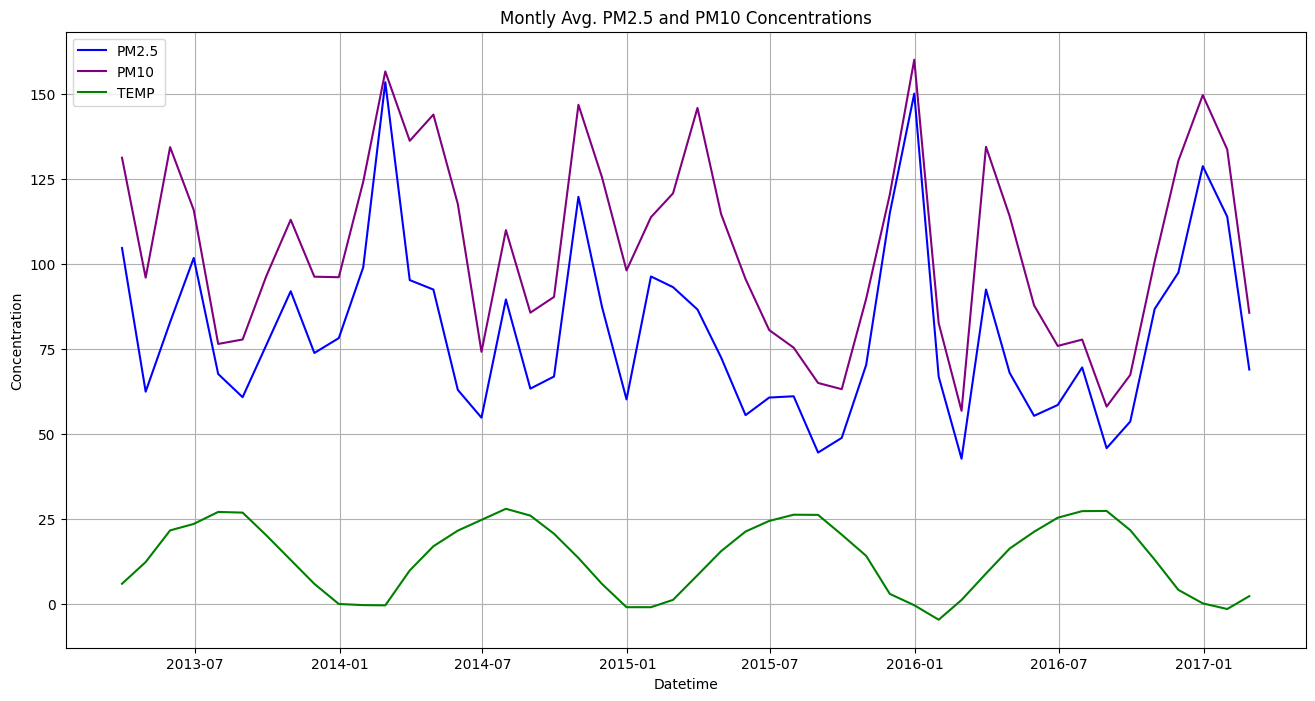

In [76]:
plt.figure(figsize=(16, 8))
merged_df_resample = merged_df_groupby_stations[['PM2.5','PM10','TEMP']].resample('M').mean()
plt.plot(merged_df_resample.index, merged_df_resample['PM2.5'], label='PM2.5', color='blue')
plt.plot(merged_df_resample.index, merged_df_resample['PM10'], label='PM10', color='purple')
plt.plot(merged_df_resample.index, merged_df_resample['TEMP'], label='TEMP', color='green')
plt.legend()
plt.grid()
plt.title("Montly Avg. PM2.5 and PM10 Concentrations")
plt.xlabel('Datetime')
plt.ylabel('Concentration')
plt.show()

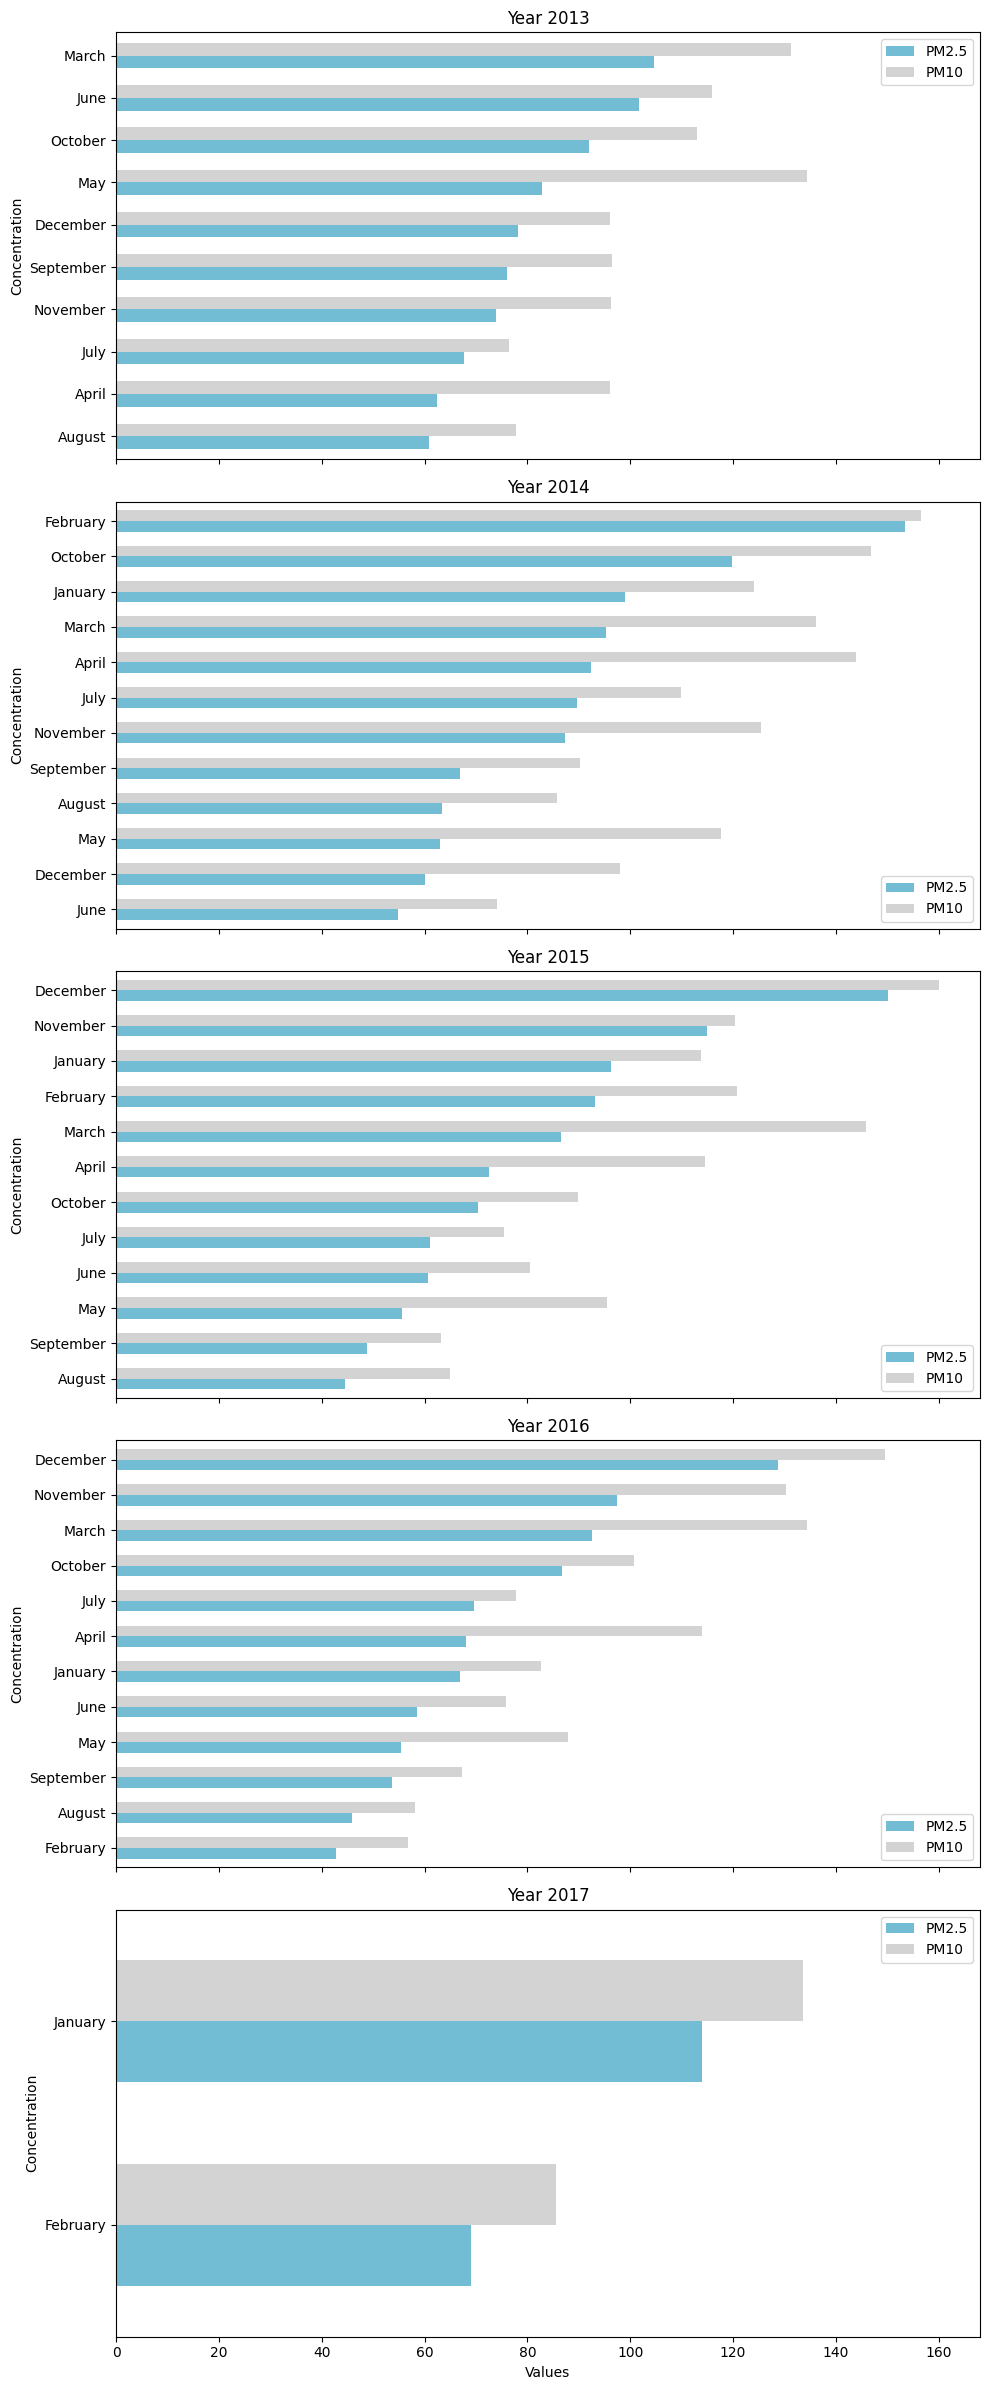

In [77]:
num_years = len(year_monthly_group)
fig, axes = plt.subplots(num_years, 1, figsize=(10, 24), sharex=True)

for i, (year, values) in enumerate(year_monthly_group.items()):
    values[['PM2.5', 'PM10']].sort_values(by='PM2.5').plot(kind='barh', width=0.6, color=["#72BCD4", "#D3D3D3"], ax=axes[i])
    axes[i].set_title(f"Year {year}")
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Concentration')

plt.tight_layout()
plt.show()

Berdasarkan hasil visualisasi dan hasil tabel pada exploratory data analysis, dapat dilihat bahwa pada bulan dengan suhu udara yang lebih rendah, tingkat `PM2.5` dan `PM10` cenderung mengalami kenaikan.

### 2. Bagaimana kondisi cuaca (curah hujan, kelembapan, suhu, kecepatan angin) terhadap tingkat polusi udara?

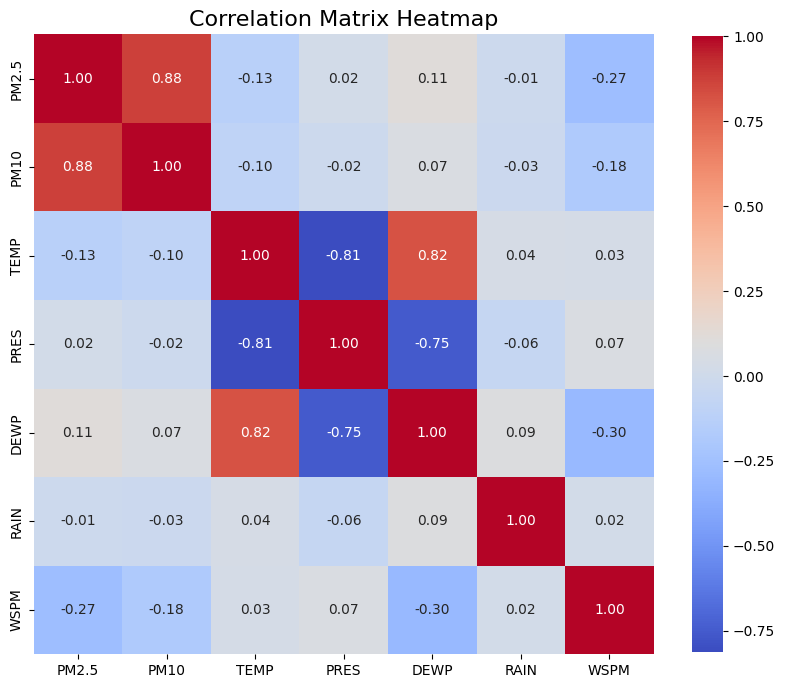

In [38]:
corr_matrix = merged_df[['PM2.5', 'PM10', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

In [39]:
corr_matrix.sort_values(by="PM2.5", ascending=False)

,PM2.5,PM10,TEMP,PRES,DEWP,RAIN,WSPM
PM2.5,1.000000,0.876213,-0.130454,0.019145,0.112820,-0.014153,-0.269565
PM10,0.876213,1.000000,-0.096779,-0.017285,0.066883,-0.026234,-0.177755
DEWP,0.112820,0.066883,0.820279,-0.750293,1.000000,0.086248,-0.296651
PRES,0.019145,-0.017285,-0.813310,1.000000,-0.750293,-0.060941,0.065323
RAIN,-0.014153,-0.026234,0.037629,-0.060941,0.086248,1.000000,0.020979
TEMP,-0.130454,-0.096779,1.000000,-0.813310,0.820279,0.037629,0.032725
WSPM,-0.269565,-0.177755,0.032725,0.065323,-0.296651,0.020979,1.000000


Berdasarkan matriks korelasi, dapat dilihat bahwa suhu (TEMP), curah hujan (RAIN), dan kecepatan angin (WSPM) memiliki korelasi negatif terhadap polutan. Sedangkan kelembapan (DEWP) memiliki korelasi positif terhadap polutan.

### 3. Bagaimana pengaruh hari dalam seminggu terhadap polusi udara?

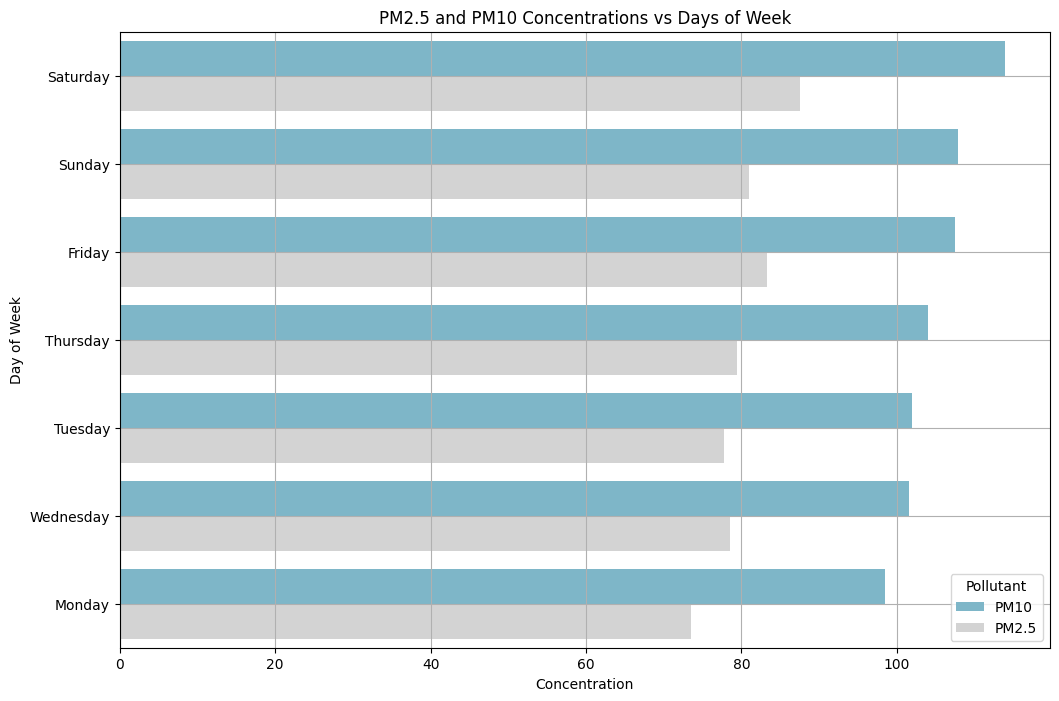

In [65]:
colors = ["#72BCD4", "#D3D3D3"]

merged_df_groupby_day = merged_df_groupby_stations.groupby('dayOfWeek')[['PM2.5','PM10']].mean().reset_index()
merged_df_melted = merged_df_groupby_day.melt(id_vars='dayOfWeek', value_vars=['PM2.5', 'PM10'], 
                                               var_name='Pollutant', value_name='Concentration')
plt.figure(figsize=(12,8))
sns.barplot(
    y='dayOfWeek',
    x='Concentration',
    hue='Pollutant',
    data=merged_df_melted.sort_values(by='Concentration', ascending=False),
    palette=colors

)
plt.title("PM2.5 and PM10 Concentrations vs Days of Week")
plt.ylabel("Day of Week")
plt.xlabel("Concentration")
plt.grid()
plt.show()

Berdasarkan hasil visualisasi, pada hari Sabtu dan Minggu polusi udara cenderung lebih tinggi dibandingkan dengan hari lainnya.

### 4. Bagaimana pengaruh waktu dalam sehari terhadap polusi udara?

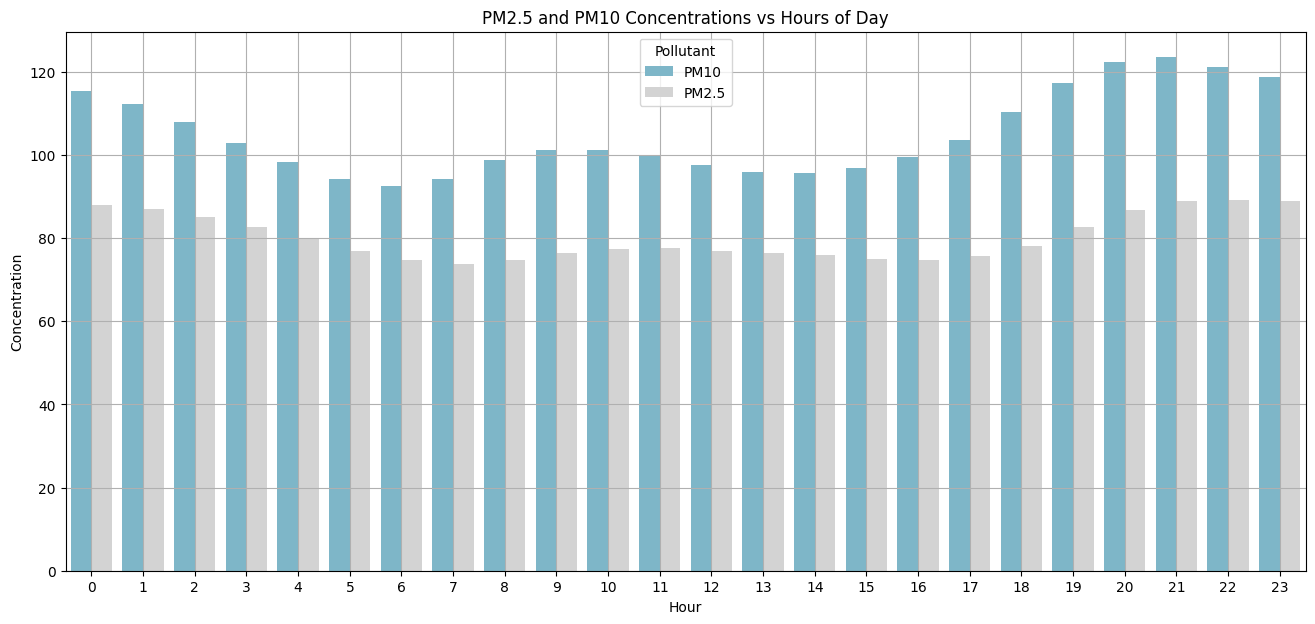

In [41]:
colors = ["#72BCD4", "#D3D3D3"]

merged_df_groupby_hour = merged_df.groupby('hour')[['PM2.5','PM10']].mean().reset_index()
merged_df_melted = merged_df_groupby_hour.melt(id_vars='hour', value_vars=['PM2.5', 'PM10'], 
                                               var_name='Pollutant', value_name='Concentration')
plt.figure(figsize=(16,7))
sns.barplot(
    x='hour',
    y='Concentration',
    hue='Pollutant',
    data=merged_df_melted.sort_values(by='Concentration', ascending=False),
    palette=colors

)
plt.title("PM2.5 and PM10 Concentrations vs Hours of Day")
plt.xlabel("Hour")
plt.ylabel("Concentration")
plt.grid()
plt.show()

Berdasarkan hasil visualisasi, rata-rata tingkat polusi udara berada pada tingkat tertingginya pada malam hari, dimana tingkat polutan mulai meningkat pada jam 17 dan berada pada puncaknya pada jam 20 - 22.

### 5. Apakah arah angin berpengaruh pada tingkat polusi udara?

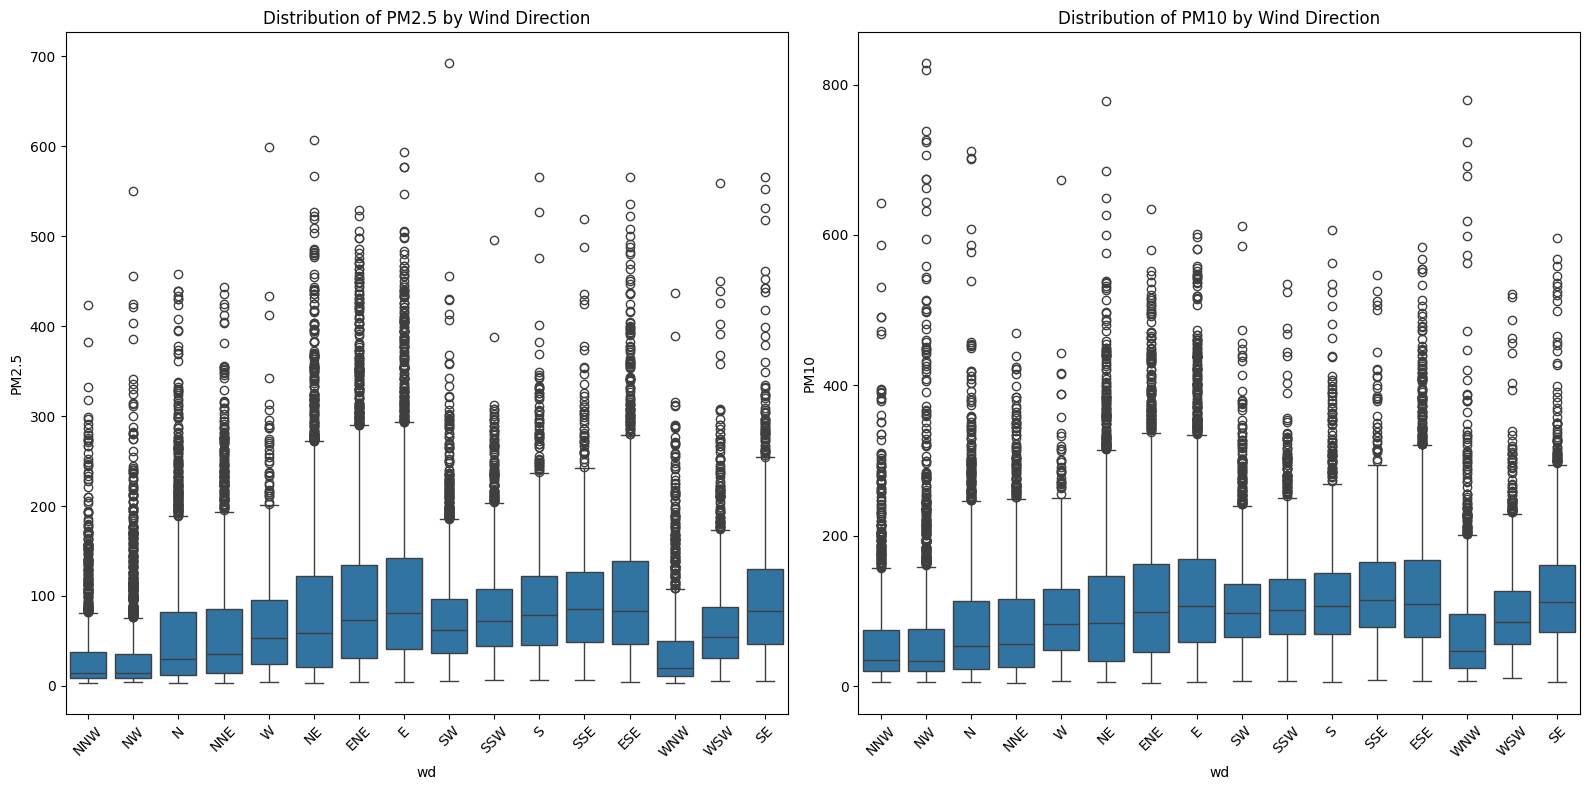

In [57]:
plt.figure(figsize=(16,8))

plt.subplot(1, 2, 1) 
sns.boxplot(x='wd', y='PM2.5', data=merged_df_groupby_stations)
plt.title('Distribution of PM2.5 by Wind Direction')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(x='wd', y='PM10', data=merged_df_groupby_stations)
plt.title('Distribution of PM10 by Wind Direction')
plt.xticks(rotation=45)

# Show the plots
plt.tight_layout()
plt.show()

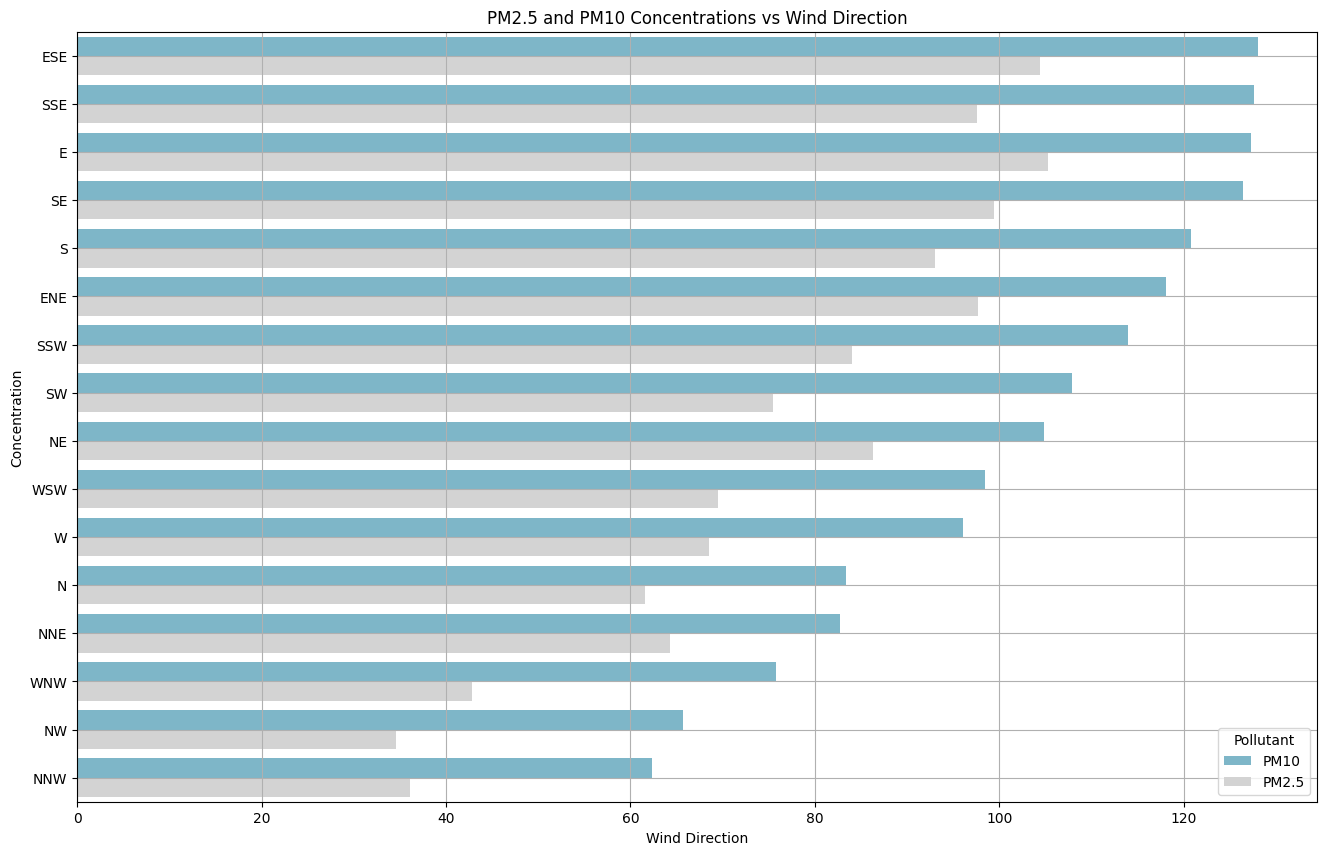

In [58]:
colors = ["#72BCD4", "#D3D3D3"]

merged_df_groupby_wd = merged_df_groupby_stations.groupby('wd')[['PM2.5','PM10']].mean().reset_index()
merged_df_melted = merged_df_groupby_wd.melt(id_vars='wd', value_vars=['PM2.5', 'PM10'], 
                                               var_name='Pollutant', value_name='Concentration')
plt.figure(figsize=(16,10))
sns.barplot(
    y='wd',
    x='Concentration',
    hue='Pollutant',
    data=merged_df_melted.sort_values(by='Concentration', ascending=False),
    palette=colors

)
plt.title("PM2.5 and PM10 Concentrations vs Wind Direction")
plt.xlabel("Wind Direction")
plt.ylabel("Concentration")
plt.grid()
plt.show()

Berdasarkan hasil ANOVA test yang dilakukan pada exploratory data analysis, dan hasil visualisasi box plot dan bar plot, terlihat bahwa nilai F-test yang dihasilkan cukup tinggi berada pada angka 215.491 dan p-value bernilai dibawah 0.05 yang menandakan bahwa setiap arah angin berbeda secara signifikan dengan lainnya.

Pada visualisasi boxplot dan bar plot ditunjukkan distribusi nilai `PM2.5` dan `PM10` yang berbeda antara masing-masing arah angin, dengan arah angin East-Southeast (ESE) dan South-Southeast (SSE) memiliki tingkat polusi udara yang tertinggi.

# Conclusion

- Untuk setiap tahunnya, terdapat periode dimana tingkat polusi udara di Beijing berada pada tingkat tertingginya, yaitu pada bulan-bulan dimana suhu udara rendah atau pada musim dingin. 
- Kondisi cuaca mempengaruhi tingkat polusi udara, dimana suhu, curah hujan, dan kecepatan angin memiliki korelasi negatif dengan konsentrasi polutan. Sedangkan kelembapan memiliki korelasi positif terhadap konsentrasi polutan.
- Tingkat polusi udara cenderung lebih tinggi pada akhir pekan dibandingkan pada hari kerja.
- Tingkat polusi udara cenderung lebih tinggi pada malam hari, terutama pada pukul 19.00 hingga 02.00.
- Terdapat pengaruh yang signifikan antara arah angin (`wd`) dan konsentrasi polutan, dimana arah angin Timur-Tenggara dan Selatan-Tenggara memiliki tingkat konsentrasi polutan yang lebih tinggi.